This example notebook shows an example of ADC-TOT cross-calibration for an example channel, using data from run 300. But, where I've just guessed some parameters to make the TOT-to-ADC correction! Not using the charge injections at all. 

In [1]:
!pip install -r ../requirements.txt

import sys
sys.path.append('../src')
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import get_cmap
import math
#import mplhep as hep
#hep.style.use(hep.style.ATLAS)

from selectCleanEvents import *

In [2]:
electrons = pd.read_csv('../analysis_files/run_300_aligned.csv')

In [3]:
events = electrons.loc[electrons['layer'] == 7].loc[electrons['strip'] == 4]

In [4]:
adcsum = []
alladc = []
tot = []
alltot = []
#totcorrected = []

collected = []

#print(totthreshold)

for index, row in events.iterrows():
    alladc.append(row['adc_sum_end1'])
    alltot.append(row['tot_end1'])
    #print(row['adc_sum_end0'], row['tot_end0'])
    if row['tot_end1'] < 750 and row['adc_sum_end1'] > 3700:
        continue
    elif row['tot_end1'] < 1000:
        #adcsum.append(row['adc_sum_end1'])
        adcsum.append(row['adc_sum_end1'])
        collected.append(row['adc_sum_end1'])
    else:
        #t = row['tot_end1']*2.2+1000
        #t = row['tot_end1']*2.0+1100
        t = row['tot_end1']*3+300
        tot.append(t)
        collected.append(t)
        #t = row['tot_end1']
        #if t > max(TOTs):
        #    p = max(TOTs)
        #index = 0
        ##for i in range(0,len(TOTs)):
        #    if TOTs[i] >= t:
        #        index = i
        #        break
        #totcorrected.append(sumADCs[i])
        #collected.append(sumADCs[i])

        

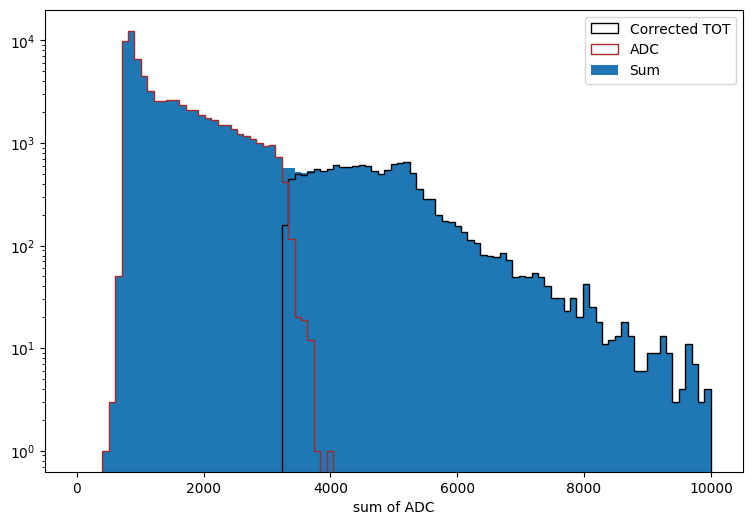

In [12]:
fig = plt.figure(figsize=(9,6))

bins = np.linspace(0,10000,100)

plt.hist(tot, bins=bins, histtype="step", color="black", label="Corrected TOT")
plt.hist(adcsum, bins=bins, histtype="step", color="brown", label="ADC")
plt.hist(collected,bins=bins, label="Sum")
plt.yscale("log")
plt.xlabel("sum of ADC")
plt.legend()
plt.show()
